In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
from datetime import datetime

# Función para calcular las correlaciones de Spearman y Kendall
def calculate_correlations(original_data, imputed_data):
    spearman_corr, _ = spearmanr(original_data, imputed_data)
    kendall_corr, _ = kendalltau(original_data, imputed_data)
    return spearman_corr, kendall_corr

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\PP.csv"
original_data = pd.read_csv(original_data_path)

# Conversión de la fecha a formato datetime y establecer como índice
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Fechas de los datos imputados
missing_dates = [
    datetime(1982, 1, 19), datetime(1982, 1, 21), datetime(1982, 3, 11), datetime(1984, 10, 11), 
    datetime(1986, 8, 19), datetime(1986, 11, 19), datetime(1988, 3, 13), datetime(1994, 1, 4), 
    datetime(1997, 4, 7), datetime(1999, 4, 1), datetime(2001, 2, 24), datetime(2003, 7, 18), 
    datetime(2005, 1, 9), datetime(2005, 9, 14), datetime(2006, 12, 17)
]

# Preparar un DataFrame para guardar los resultados
correlation_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'PP_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos originales y los imputados solo para la ID_CIDERH "M_030_A_XV"
            original_sub = original_data[original_data['ID_CIDERH'] == 'M_030_A_XV']
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_030_A_XV']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_sub.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular las correlaciones
            spearman_corr, kendall_corr = calculate_correlations(original_missing['PP_RBE'], imputed_missing['PP_RBE'])

            # Agregar los resultados a la lista
            correlation_results.append({
                'Technique': technique,
                'File': file_name,
                'Spearman': spearman_corr,
                'Kendall': kendall_corr
            })

# Convertir la lista de resultados en un DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Guardar los resultados en un archivo CSV
results_csv_path = os.path.join(base_directory, 'correlations_results.csv')
correlation_results_df.to_csv(results_csv_path, index=False)

# Imprimir los resultados
print(correlation_results_df)

   Technique                        File  Spearman   Kendall
0   Hot_Deck  PP_imputado_Hot_Deck_2.csv  0.436097  0.514039
1   Hot_Deck  PP_imputado_Hot_Deck_3.csv  0.420903  0.459353
2   Hot_Deck  PP_imputado_Hot_Deck_4.csv  0.527060  0.524974
3   Hot_Deck  PP_imputado_Hot_Deck_5.csv  0.418605  0.409194
4   Hot_Deck  PP_imputado_Hot_Deck_6.csv  0.273388  0.277161
..       ...                         ...       ...       ...
79        ID       PP_imputado_ID_11.csv  0.182055  0.146342
80        ID       PP_imputado_ID_12.csv  0.182055  0.146342
81        ID       PP_imputado_ID_13.csv -0.014698  0.020806
82        ID       PP_imputado_ID_14.csv -0.183729 -0.083225
83        ID       PP_imputado_ID_15.csv -0.216800 -0.145644

[84 rows x 4 columns]


In [2]:
import pandas as pd

# Asegúrate de tener la ruta correcta al archivo CSV
df = pd.read_csv("correlations_results.csv")

# Calcular estadísticas descriptivas para Spearman y Kendall por técnica
descriptive_stats_spearman = df.groupby('Technique')['Spearman'].describe()
descriptive_stats_kendall = df.groupby('Technique')['Kendall'].describe()

# Calcular el IQR para Spearman y Kendall
descriptive_stats_spearman['IQR'] = descriptive_stats_spearman['75%'] - descriptive_stats_spearman['25%']
descriptive_stats_kendall['IQR'] = descriptive_stats_kendall['75%'] - descriptive_stats_kendall['25%']

# Medidas adicionales de Kurtosis y Skewness
descriptive_stats_spearman['Kurtosis'] = df.groupby('Technique')['Spearman'].apply(pd.Series.kurtosis)
descriptive_stats_spearman['Skewness'] = df.groupby('Technique')['Spearman'].skew()
descriptive_stats_kendall['Kurtosis'] = df.groupby('Technique')['Kendall'].apply(pd.Series.kurtosis)
descriptive_stats_kendall['Skewness'] = df.groupby('Technique')['Kendall'].skew()

print(descriptive_stats_spearman)
print(descriptive_stats_kendall)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  0.165596  0.262581 -0.316014  0.128754  0.152632   
ID             14.0  0.202359  0.221527 -0.216800  0.174738  0.182055   
IDW            14.0  0.514269  0.390392 -0.380319  0.410542  0.559537   
KNN            14.0  0.159866  0.241742 -0.284780  0.114014  0.126080   
Razon_Normal   14.0  0.273315  0.369002 -0.334686  0.086477  0.228562   
WKNNI          14.0  0.162838  0.226677 -0.246197  0.114039  0.137920   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      0.383498  0.527060  0.254744 -0.141042 -0.693837  
ID            0.380705  0.519611  0.205967 -0.121968 -0.616218  
IDW           0.797379  0.983098  0.386836  0.818873 -1.056645  
KNN           0.364057  0.502849  0.250043 -0.360232 -0.525295  
Razon_Normal  0.558235  0

<Figure size 800x400 with 0 Axes>

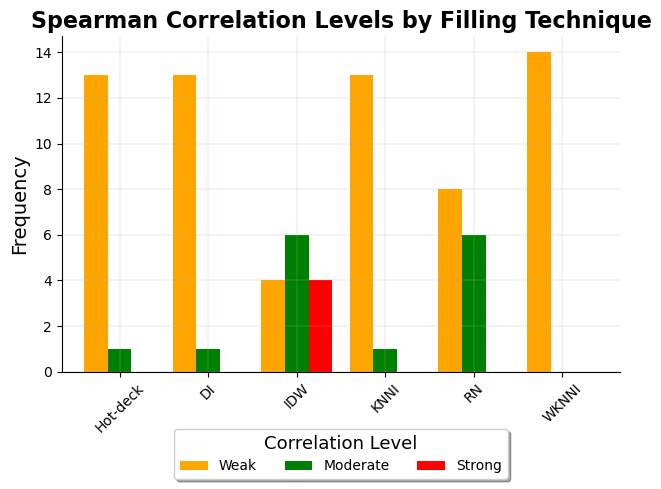

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("correlations_results.csv")

# Correlaciones de spearman
#correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[0, 0.3, 0.6, 1], labels=['Weak', 'Moderate', 'Strong'])

correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
spearman_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
spearman_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Spearman Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.show()

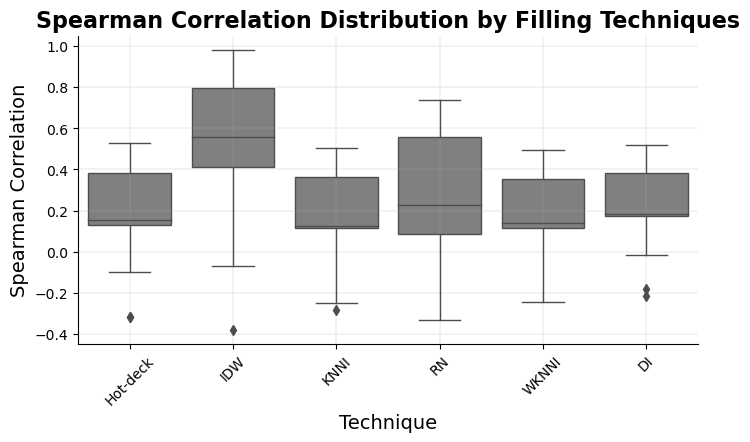

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Spearman', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Spearman Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

<Figure size 1000x600 with 0 Axes>

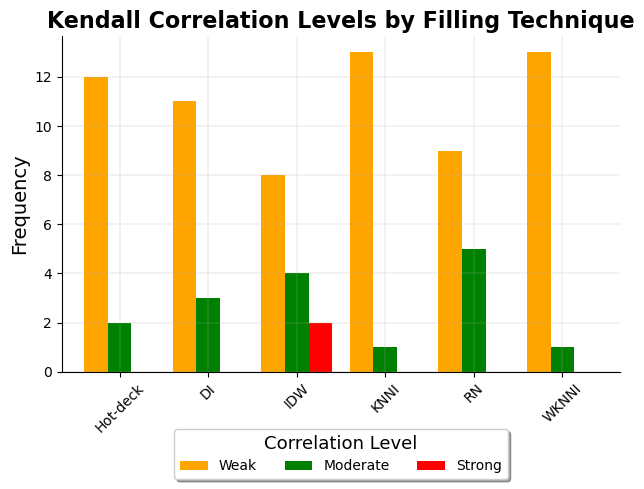

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation_results_df = pd.read_csv("correlations_results.csv")

# Kendall correlation categorization
correlation_results_df['Kendall_Cat'] = pd.cut(correlation_results_df['Kendall'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
kendall_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
kendall_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Kendall Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
# Display plot
plt.show()

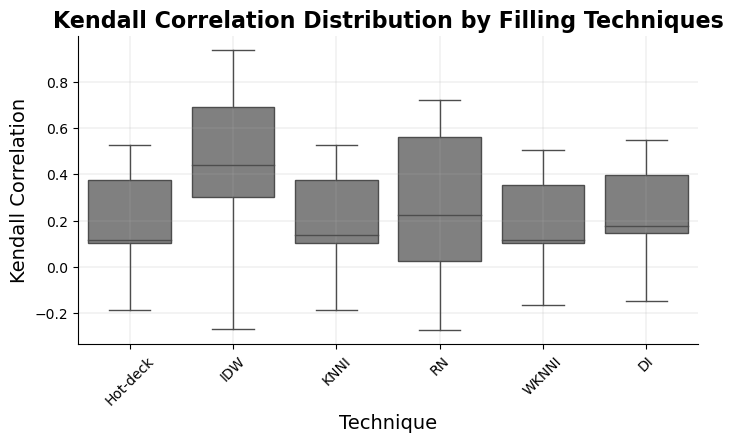

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Kendall', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Kendall Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Kendall Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

In [1]:
import os
import pandas as pd
from datetime import datetime

# Función para calcular los errores residuales
def calculate_residual_errors(original_data, imputed_data):
    return (original_data - imputed_data).abs()

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\PP.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Asegúrate de filtrar los datos originales para la ID_CIDERH "M_030_A_XV"
original_data = original_data[original_data['ID_CIDERH'] == 'M_030_A_XV']

# Fechas de los datos imputados como datetime objects
missing_dates = [
    datetime(1982, 1, 19), datetime(1982, 1, 21), datetime(1982, 3, 11), datetime(1984, 10, 11), 
    datetime(1986, 8, 19), datetime(1986, 11, 19), datetime(1988, 3, 13), datetime(1994, 1, 4), 
    datetime(1997, 4, 7), datetime(1999, 4, 1), datetime(2001, 2, 24), datetime(2003, 7, 18), 
    datetime(2005, 1, 9), datetime(2005, 9, 14), datetime(2006, 12, 17)
]

# Preparar un DataFrame para guardar los errores residuales
residuals_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'PP_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos imputados solo para la ID_CIDERH "M_030_A_XV"
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_030_A_XV']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_data.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular los errores residuales
            residual_errors = calculate_residual_errors(original_missing['PP_RBE'], imputed_missing['PP_RBE'])

            # Agregar los resultados a la lista
            residuals_results.append({
                'Technique': technique,
                'File': file_name,
                'Residual_Error': residual_errors.mean()  # Calculamos la media del error residual
            })

# Convertir la lista de errores residuales en un DataFrame
residuals_df = pd.DataFrame(residuals_results)

# Guardar los errores residuales en un archivo CSV
residuals_csv_path = os.path.join(base_directory, 'residuals_results.csv')
residuals_df.to_csv(residuals_csv_path, index=False)

# Calcular estadísticas descriptivas para los errores residuales
descriptive_stats_residuals = residuals_df.groupby('Technique')['Residual_Error'].describe()

# Calcular el IQR 
descriptive_stats_residuals['IQR'] = descriptive_stats_residuals['75%'] - descriptive_stats_residuals['25%']

# Agregar medidas de curtosis y asimetría
descriptive_stats_residuals['Kurtosis'] = residuals_df.groupby('Technique')['Residual_Error'].apply(pd.Series.kurtosis)
descriptive_stats_residuals['Skewness'] = residuals_df.groupby('Technique')['Residual_Error'].skew()

print(descriptive_stats_residuals)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  3.338897  1.773691  0.704305  1.672047  3.802979   
ID             14.0  2.928300  1.494113  0.623383  1.581202  3.433421   
IDW            14.0  0.668595  0.354967  0.153117  0.423686  0.627141   
KNN            14.0  3.048618  1.569107  0.674120  1.614952  3.595288   
Razon_Normal   14.0  2.028080  1.183890  0.448295  0.993321  2.084165   
WKNNI          14.0  3.193175  1.572908  0.662890  1.799840  3.728737   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      4.313828  5.879332  2.641782 -1.226696 -0.115356  
ID            3.746107  4.996258  2.164905 -1.153698 -0.336946  
IDW           0.858431  1.343687  0.434746 -0.460163  0.427661  
KNN           3.912678  5.213077  2.297726 -1.187066 -0.318313  
Razon_Normal  3.046705  3

In [2]:
#leer archivo csv
archivo_csv = "residuals_results.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

   Technique                        File  Residual_Error
0   Hot_Deck  PP_imputado_Hot_Deck_2.csv        0.704305
1   Hot_Deck  PP_imputado_Hot_Deck_3.csv        0.950097
2   Hot_Deck  PP_imputado_Hot_Deck_4.csv        1.246796
3   Hot_Deck  PP_imputado_Hot_Deck_5.csv        1.439140
4   Hot_Deck  PP_imputado_Hot_Deck_6.csv        2.370767
..       ...                         ...             ...
79        ID       PP_imputado_ID_11.csv        3.730282
80        ID       PP_imputado_ID_12.csv        3.751382
81        ID       PP_imputado_ID_13.csv        4.417378
82        ID       PP_imputado_ID_14.csv        4.875022
83        ID       PP_imputado_ID_15.csv        4.996258

[84 rows x 3 columns]


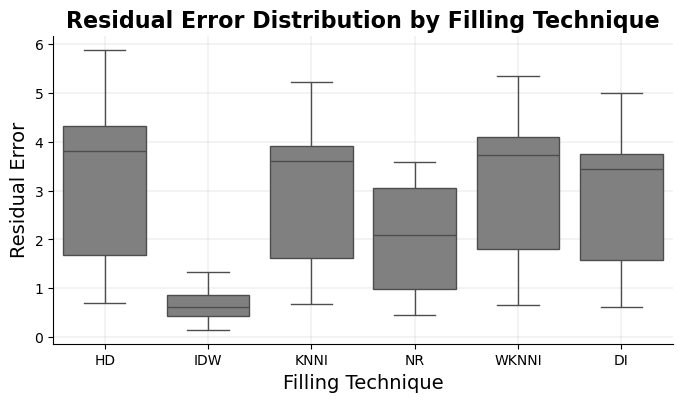

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}


residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Technique', y='Residual_Error', data=residuals_df, color='gray', linewidth=1)
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Residual Error Distribution by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Technique', fontsize=14)
plt.ylabel('Residual Error', fontsize=14)
sns.despine()

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


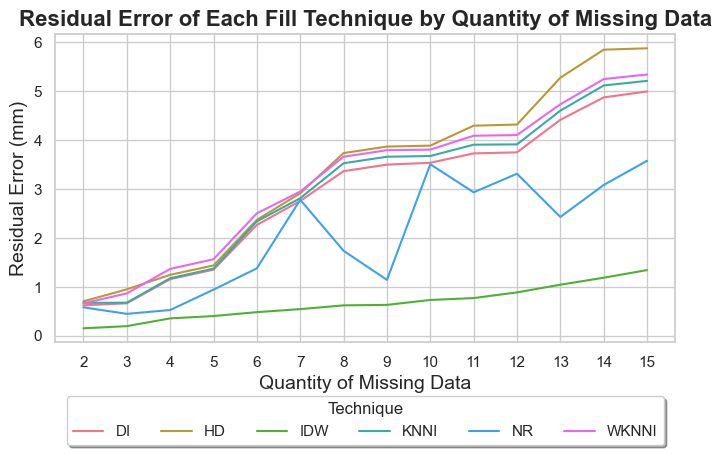

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

residuals_df = pd.read_csv('residuals_results.csv')

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

residuals_df['Iteration'] = residuals_df['File'].str.extract(r'_(\d+)\.csv').astype(int)

pivot_df = residuals_df.pivot(index='Iteration', columns='Technique', values='Residual_Error')

# Define el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de líneas con líneas continuas
plt.figure(figsize=(8, 4))

palette = sns.color_palette("husl", len(pivot_df.columns))

sns.lineplot(data=pivot_df, palette=palette, dashes=False)

# Añade título y etiquetas a los ejes
plt.title('Residual Error of Each Fill Technique by Quantity of Missing Data', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Missing Data', fontsize=14)
plt.ylabel('Residual Error (mm)', fontsize=14)

# Añade leyenda fuera del gráfico
plt.legend(title='Technique', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(pivot_df.columns))

plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

# Muestra el gráfico
plt.show()